In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv('sgemm_product.csv')

In [3]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
df.isna().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [5]:
print(df.describe())

                 MWG            NWG            KWG          MDIMC  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean       80.415364      80.415364      25.513113      13.935894   
std        42.469220      42.469220       7.855619       7.873662   
min        16.000000      16.000000      16.000000       8.000000   
25%        32.000000      32.000000      16.000000       8.000000   
50%        64.000000      64.000000      32.000000       8.000000   
75%       128.000000     128.000000      32.000000      16.000000   
max       128.000000     128.000000      32.000000      32.000000   

               NDIMC          MDIMA          NDIMB            KWI  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean       13.935894      17.371126      17.371126       5.000000   
std         7.873662       9.389418       9.389418       3.000006   
min         8.000000       8.000000       8.000000       2.000000   
25%         8.000000       8.0000

In [6]:
df['average_time'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'])

In [7]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),average_time
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,465.48
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,314.82
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,322.26
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,346.55
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,474.65


In [8]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)

In [9]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_time
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,465.48
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,314.82
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,322.26
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,346.55
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,474.65


## Using pairplot method to understand the distribution of each variable with other

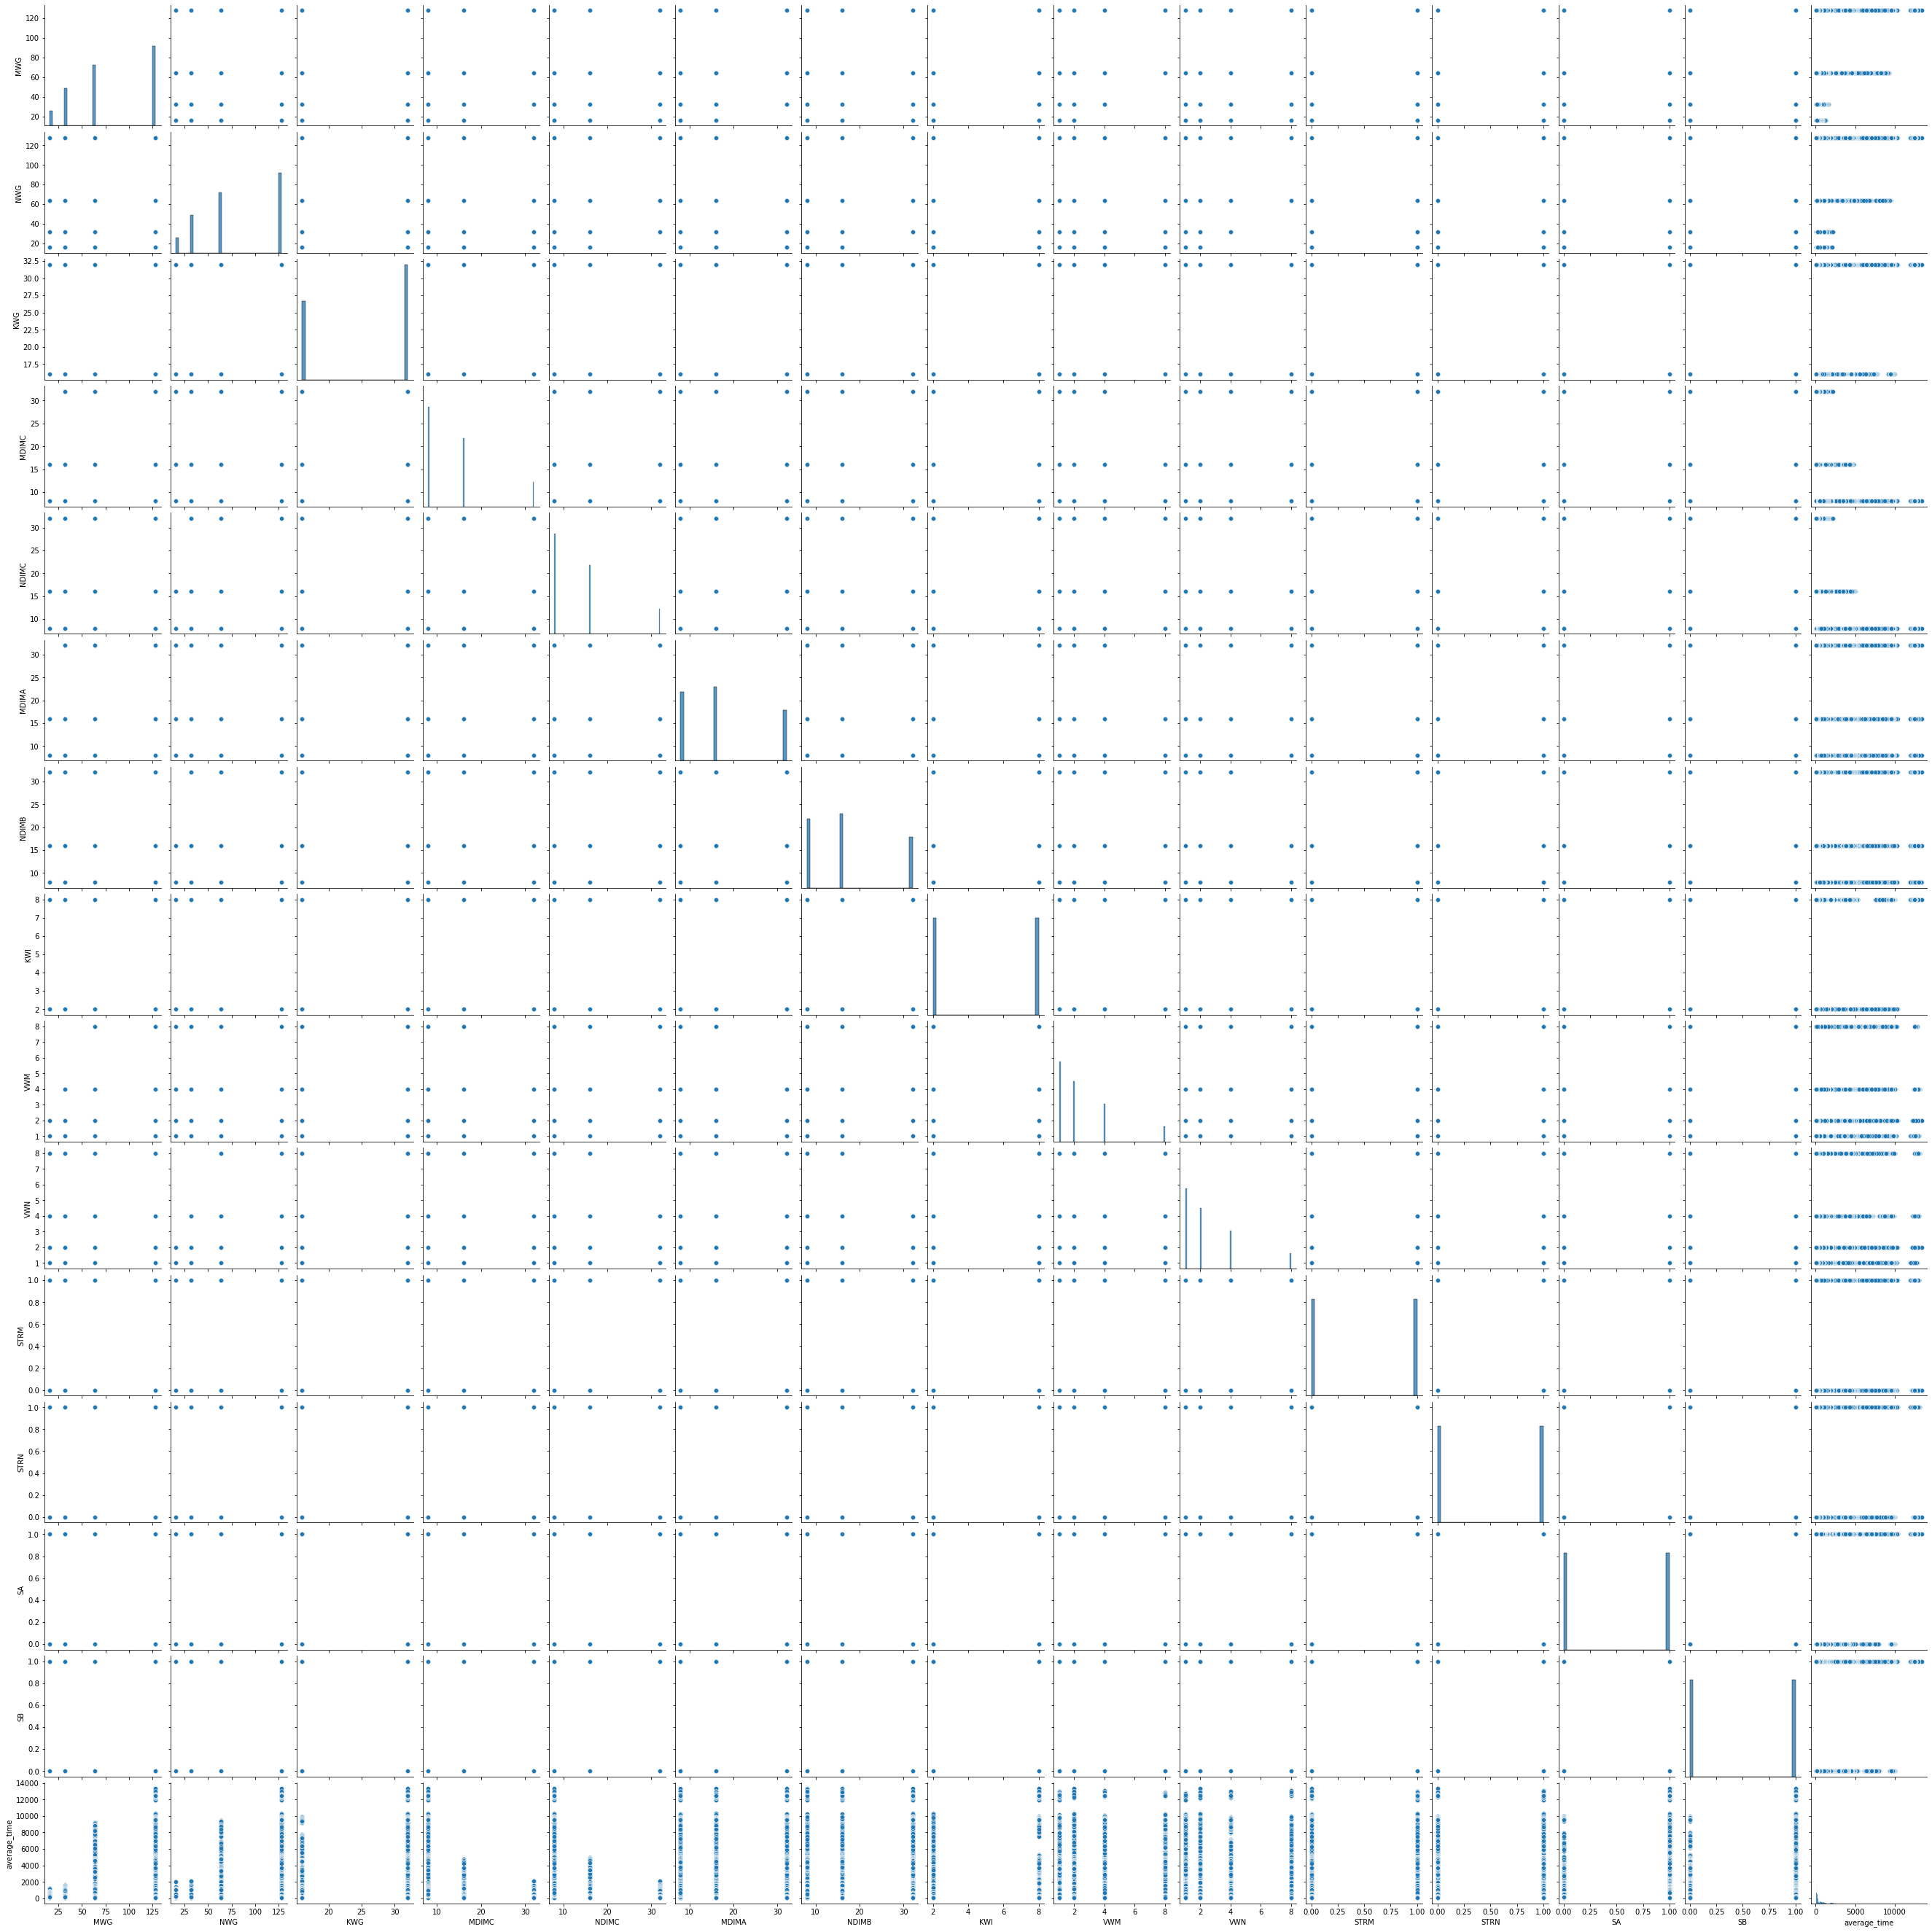

In [10]:
sb.pairplot(df)

<AxesSubplot:>

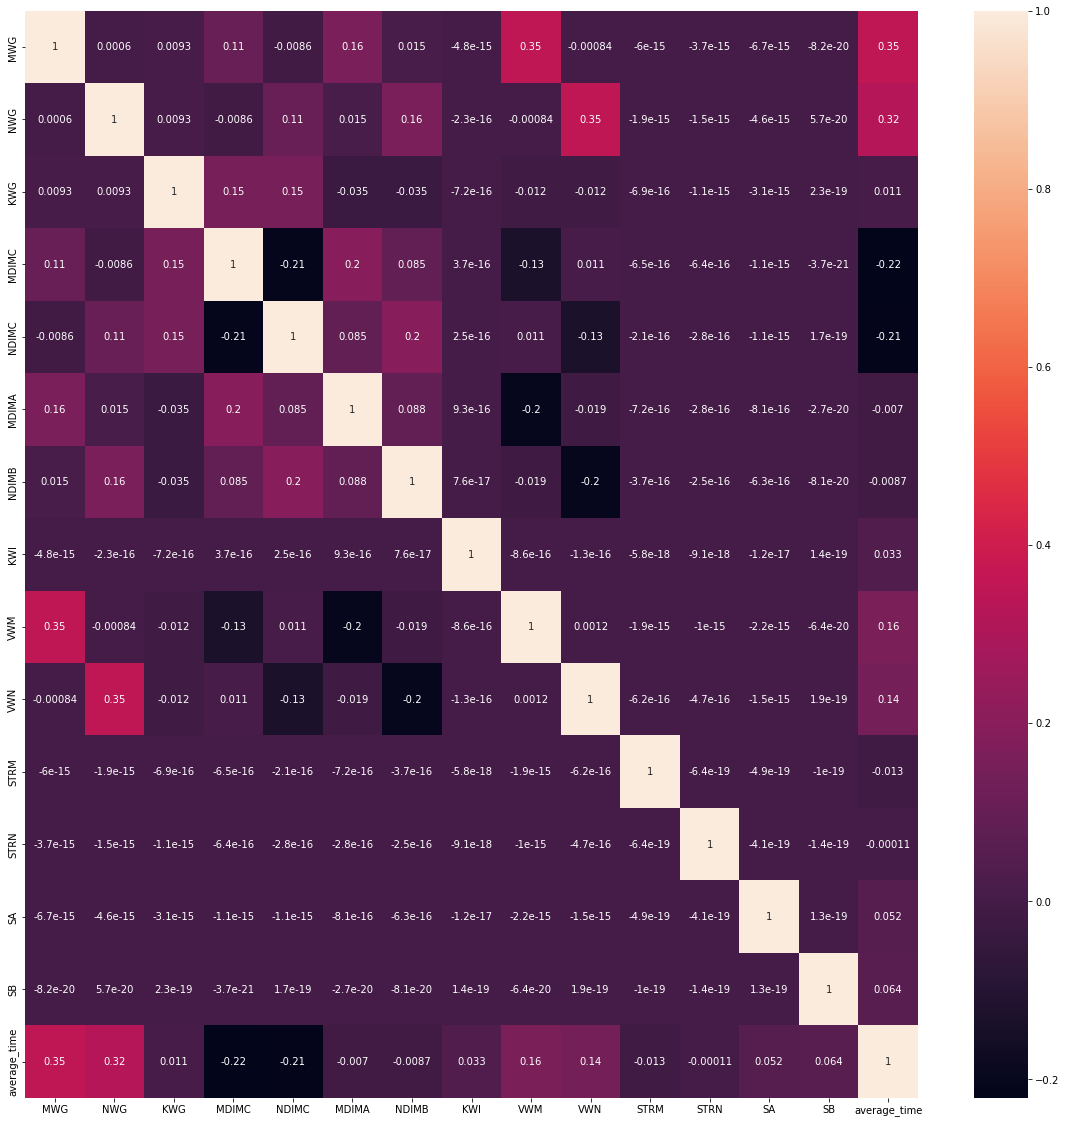

In [11]:
import matplotlib.pyplot as plt
# Create a new figure with the desired size
fig, ax = plt.subplots(figsize=(20, 20))

# Create the heatmap
sb.heatmap(df.corr(), annot = True, ax=ax)

In [12]:
X = df.iloc[:,0:-1].values
Y = df['average_time'].values

In [13]:
print(X.shape,Y.shape)

(241600, 14) (241600,)


## Data Preprocessing: Standard Scaler

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()

In [16]:
X = ss.fit_transform(X)

## Splitting the data using train test split from model selection

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [18]:
print(xtrain.shape,xtest.shape)

(169120, 14) (72480, 14)


## Using LinearRegression model for fitting the data

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [21]:
y_pred = lr.predict(xtest)

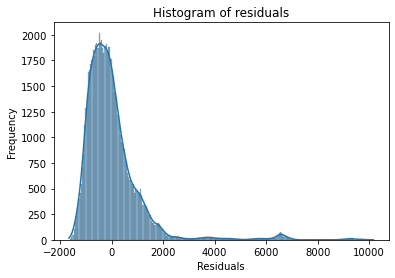

C:\Users\Saurabh Tiwari\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


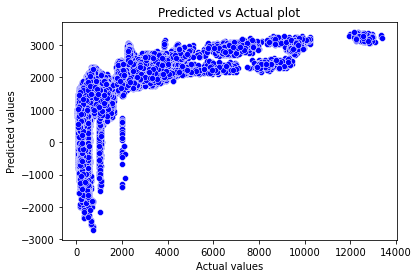

In [22]:
# Residual plot
residuals = ytest - y_pred
# Histogram of residuals
sb.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()
## Scatter Plot
sb.scatterplot(ytest, y_pred, color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual plot')
plt.show()

## Using Mean Squared Error for evaluating 

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(ytest,y_pred)
print(r2_score(ytest, y_pred))

0.4071436583091149


In [24]:
print(mse)

1298161.8030517844


## Using Lasso Regression 

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.3)

In [26]:
lasso_pred = lasso.predict(xtest)

## Checking if mse is decreased or not

In [27]:
mse2 = mean_squared_error(ytest,lasso_pred)
print(mse2)

1298173.5086898261


## Hyperparameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

gs = GridSearchCV(Lasso(),param_grid,cv=5)

In [30]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]})

In [31]:
print(gs.best_params_)

{'alpha': 0.1}


In [32]:
best_model = gs.best_estimator_
gs_pred = best_model.predict(xtest)

In [33]:
mse3 = mean_squared_error(ytest,gs_pred)
print(mse3)


1298165.3171915966


In [34]:
print('MSE: {:.3f}'.format(mse3))
print('r2 score is ', r2_score(ytest, gs_pred))

MSE: 1298165.317
r2 score is  0.40714205343977705


## Plotting the prediction vs Actual values

In [35]:
import matplotlib.pyplot as plt

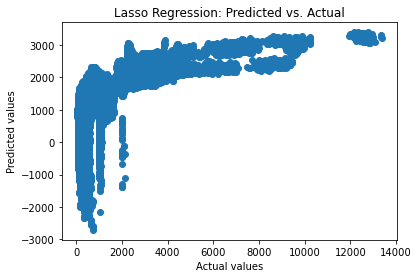

In [36]:
plt.scatter(ytest, gs_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Lasso Regression: Predicted vs. Actual')
plt.show()

In [37]:
residuals = ytest-gs_pred

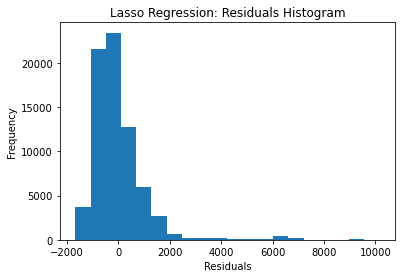

In [38]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Lasso Regression: Residuals Histogram')
plt.show()

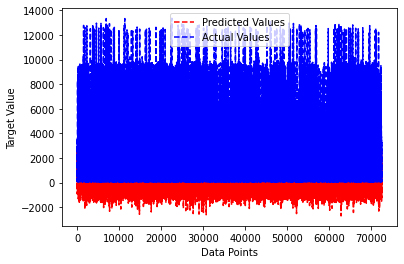

In [39]:
plt.plot(range(len(y_pred)),y_pred, "r--", label = "Predicted Values")
plt.plot(range(len(ytest)),ytest, "b--", label = "Actual Values")
# set labels and legend
plt.xlabel('Data Points')
plt.ylabel('Target Value')
plt.legend()

# show plot
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MWG           241600 non-null  int64  
 1   NWG           241600 non-null  int64  
 2   KWG           241600 non-null  int64  
 3   MDIMC         241600 non-null  int64  
 4   NDIMC         241600 non-null  int64  
 5   MDIMA         241600 non-null  int64  
 6   NDIMB         241600 non-null  int64  
 7   KWI           241600 non-null  int64  
 8   VWM           241600 non-null  int64  
 9   VWN           241600 non-null  int64  
 10  STRM          241600 non-null  int64  
 11  STRN          241600 non-null  int64  
 12  SA            241600 non-null  int64  
 13  SB            241600 non-null  int64  
 14  average_time  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


## Using Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5)

In [42]:
regressor.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5)

In [43]:
y_pred = regressor.predict(xtest)

In [44]:
mse = mean_squared_error(ytest,y_pred)

In [45]:
print(mse)
print(r2_score(ytest, y_pred))

490548.697239538
0.7759717583871469


In [46]:
regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(xtrain,ytrain)
y_pred = regressor.predict(xtest)
mse = mean_squared_error(ytest,y_pred)
print(mse)
print(r2_score(ytest, y_pred))

9889.389545469176
0.9954836236178727


In [47]:
residual = ytest-y_pred

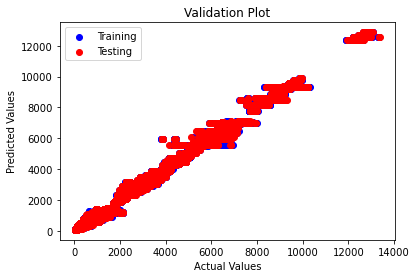

In [48]:
plt.scatter(ytrain, regressor.predict(xtrain), label='Training', color='b')
plt.scatter(ytest, regressor.predict(xtest), label='Testing', color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Plot')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import r2_score
result = r2_score(ytest,y_pred)

In [50]:
print(result)

0.9954836236178727


In [51]:
y_train_pred = regressor.predict(xtrain)

In [52]:
mse_train = mean_squared_error(ytrain, y_train_pred)

In [53]:
print(mse_train)

9162.22031400228


In [54]:
mse_test = mean_squared_error(ytest, y_pred)

In [55]:
print(mse_test)

9889.389545469176


In [56]:
train_r2score = r2_score(ytrain, y_train_pred)

In [57]:
print(train_r2score)

0.9957769854351785


In [58]:
test_r2score = r2_score(ytest, y_pred)
print(test_r2score)

0.9954836236178727


In [59]:
from sklearn.svm import SVR